# Digits Dataset
## José Benjamín Ortiz Badillo A01277673

This dataset is made up of 1797 8x8 images. Each image, is of a hand-written digit. In order to utilize an 8x8 figure we need to first transform it into a feature vector with length 64.

In [54]:
#Import libraries and the digits dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

#Main variables
digits = load_digits()
data = digits.data
target = digits.target

df = pd.DataFrame(digits.data)

df["Digit"] = digits.target

## Understanding the dataset

By printing the first 5 elements, we notice we have a 64 column dataframe. This indicates that for each of these entries, there's 64 values assigned to it. 

This can sound familiar, as we mentioned previously, each of these entries, represents a hand-written number, that is then converted into a flattened array of 64 features, corresponding to a gray-scale value of a pixel.

In this dataset, there are 10 classes, which represent each number from 0 to 9.

In [55]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Digit
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


We can verify we have number by plotting the first row of this dataset.

<Figure size 640x480 with 0 Axes>

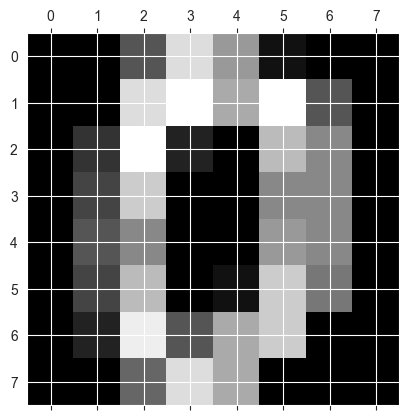

In [56]:
#Plotting the first element
plt.gray()
plt.matshow(digits.images[0])
plt.show()

As we can see, the plotting of the first row, returns a number (0).

## More examples

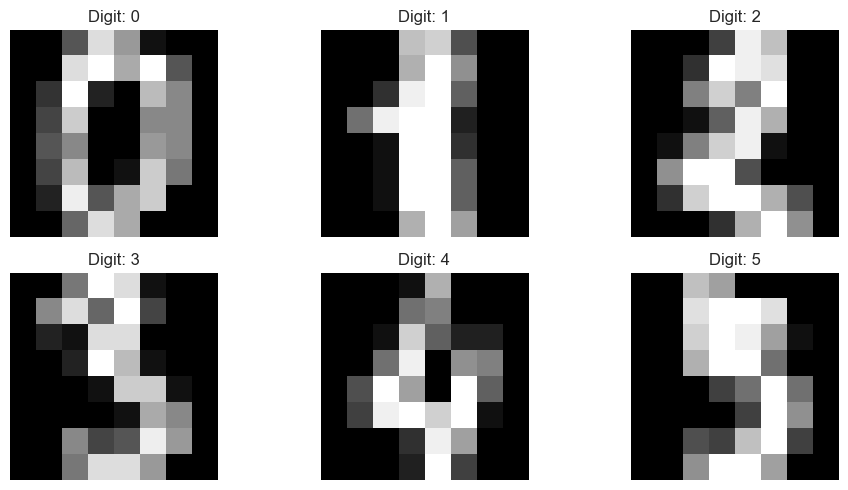

In [57]:
# Plotting the first six images
fig, axes = plt.subplots(2, 3, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Digit: {digits.target[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## Summary Statistics

Let's use the describe method for the entire dataframe.

In [58]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Digit
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


## Conclusions

1. Mean: this refers to the average intensity of each pixel, if we have a greater mean, this indicates that that pixel is usually closer to black than it is to white and vice versa.
2. Std: refers to the standard deviation of this value, for the most part, the value of this deviation is large, meaning there's more variability in how often that pixel is activated across different samples.
3. The percentiles
    1. 25%: this shows that 25% of the pixel values are below a certain intensity. For example, pixel 5 has a 25% value of 0, meaning a quarter of the samples have a 0 intensity for that pixel.
    2. 50%: the median value of the pixel intensity. Half of the samples have pixel values below this. It helps understand the typical intensity of each pixel.
    3. 75%: 75% of the samples have pixel values below this intensity, meaning only the top 25% are brighter than this value.



## Visualization

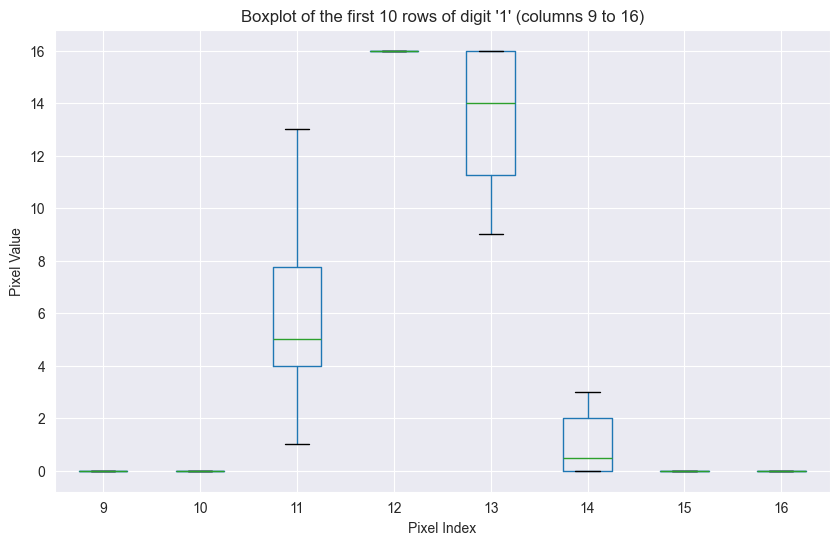

In [59]:
indices = [i for i, target in enumerate(digits.target) if target == 1][:10]
subset = df.iloc[indices, 9:17]

# Plot the boxplot for the subset
plt.figure(figsize=(10, 6))
subset.boxplot()
plt.title("Boxplot of the first 10 rows of digit '1' (columns 9 to 16)")
plt.xlabel("Pixel Index")
plt.ylabel("Pixel Value")
plt.show()

## Observations
This boxplot is showing the information of the second row (matrix wise) for the first 10 elements that represent the number "1". We can observe that the first two pixels are frequently blank, then we get a spike in the center representing the body of the "1", finally in descends meaning there's no more color in the image. Let's plot the first 10 images to watch it clearer.

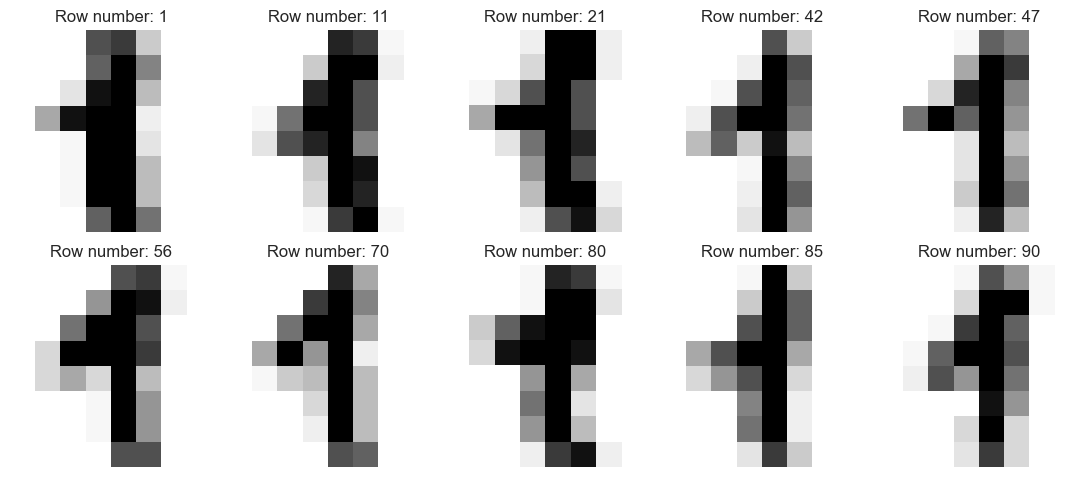

In [60]:
# Plot the first 10 images of the digit '1'
indices = [i for i, target in enumerate(digits.target) if target == 1][:10]

fig, axes = plt.subplots(2, 5, figsize=(11, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[indices[i]], cmap='Greys')
    ax.set_title(f'Row number: {indices[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In each of these images we can see the previously described pattern, there's the first 2 blank pixels, followed by the body of the "1", and finally the ink wears off and returns to its blank origin.

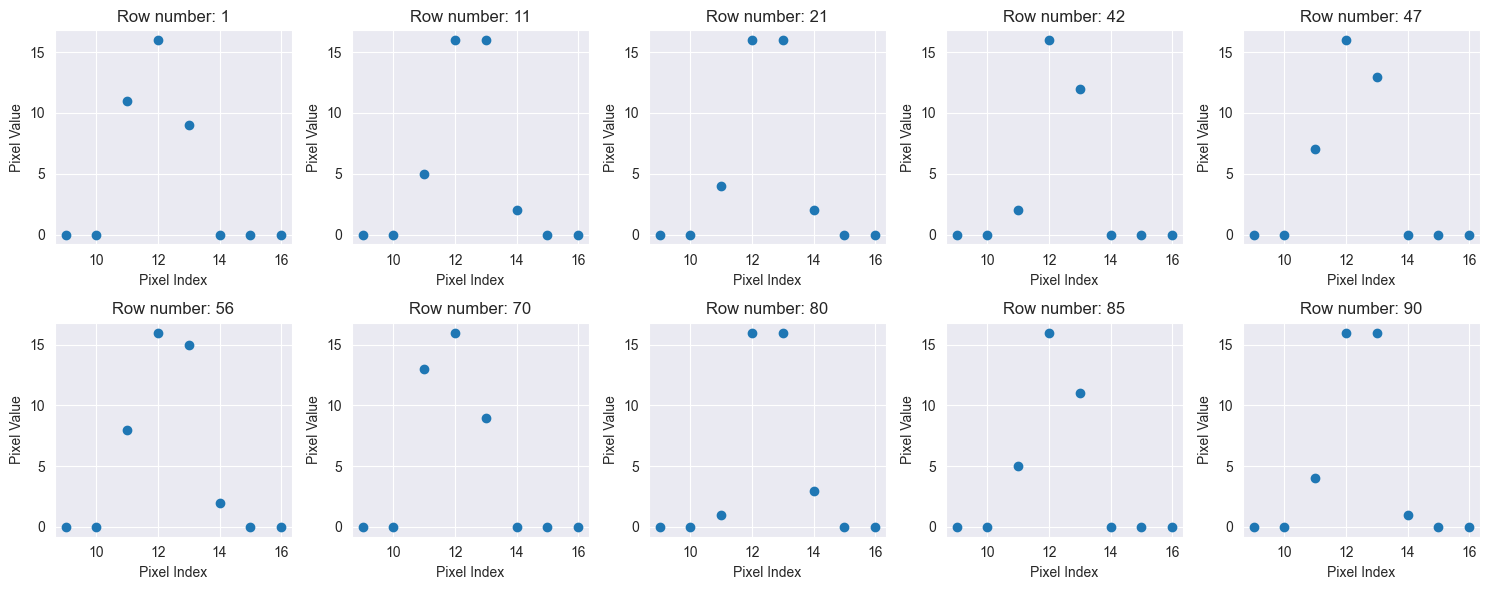

In [61]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    ax.scatter(range(9, 17), subset.iloc[i])
    ax.set_title(f'Row number: {indices[i]}')
    ax.set_xlabel('Pixel Index')
    ax.set_ylabel('Pixel Value')

plt.tight_layout()
plt.show()

The same trend that appeared in the boxplot, appears here, meaning each of these has a blank space, followed by the "1" body, and then it wears off.

## K - Means with 64 columns

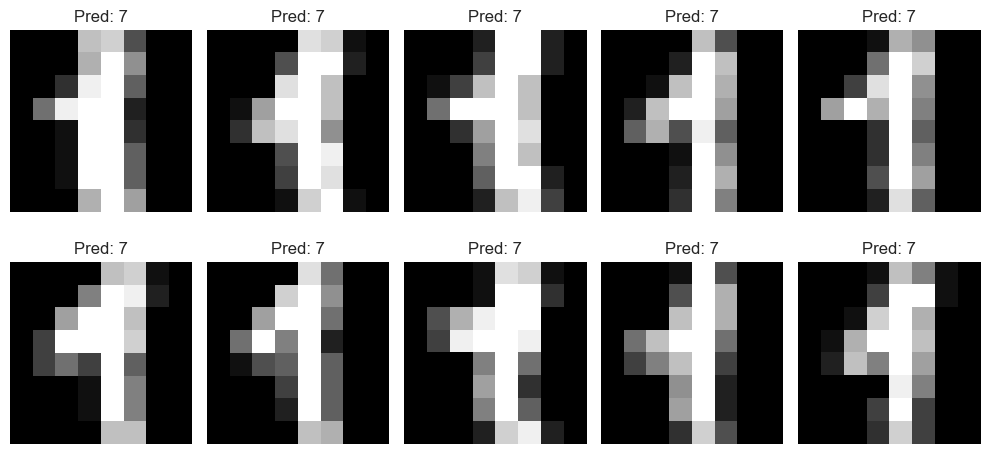

In [62]:
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(data)

# Create a DataFrame with the data and cluster labels
alteredDf = pd.DataFrame(data, columns=[f'pixel_{i}' for i in range(data.shape[1])])
alteredDf['predictionKmeans'] = clusters
alteredDf['actualDigit'] = target

digit_2_df = alteredDf[alteredDf['actualDigit'] == 1]

# Plot 10 images where the actual digit is '5' and show its prediction
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    if i < len(digit_2_df):
        index = digit_2_df.index[i]
        image = data[index].reshape(8, 8)
        prediction = digit_2_df.loc[index, 'predictionKmeans']
        ax.imshow(image, cmap='gray')
        ax.set_title(f'Pred: {prediction}')
        ax.axis('off')

plt.tight_layout()
plt.show()

## Conclusions

Most of the results given by the K-Means prediction are wrong, but this is okay, given all of the columns as the data we could have some margin of error, lets try to do it by individual rows and columns of an image.

## K-Means with Rows

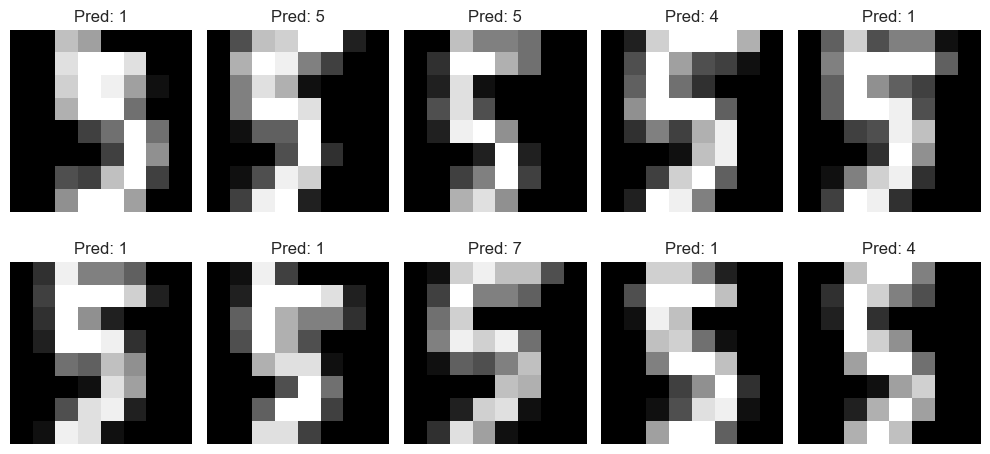

In [63]:
selected_rows = df.iloc[:, 8:15]

# Apply K-means clustering on the selected rows
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(selected_rows)

# Create a DataFrame with the data and cluster labels
alteredDf = pd.DataFrame(data, columns=[f'pixel_{i}' for i in range(data.shape[1])])
alteredDf['predictionKmeans'] = clusters
alteredDf['actualDigit'] = target

digit_5_df = alteredDf[alteredDf['actualDigit'] == 5]

# Plot 10 images where the actual digit is '5' and show its prediction
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    if i < len(digit_5_df):
        index = digit_5_df.index[i]
        image = data[index].reshape(8, 8)
        prediction = digit_5_df.loc[index, 'predictionKmeans']
        ax.imshow(image, cmap='gray')
        ax.set_title(f'Pred: {prediction}')
        ax.axis('off')

plt.tight_layout()
plt.show()

With this image, we can see that using the second row as reference does not give us the best output, let's try it with more rows.

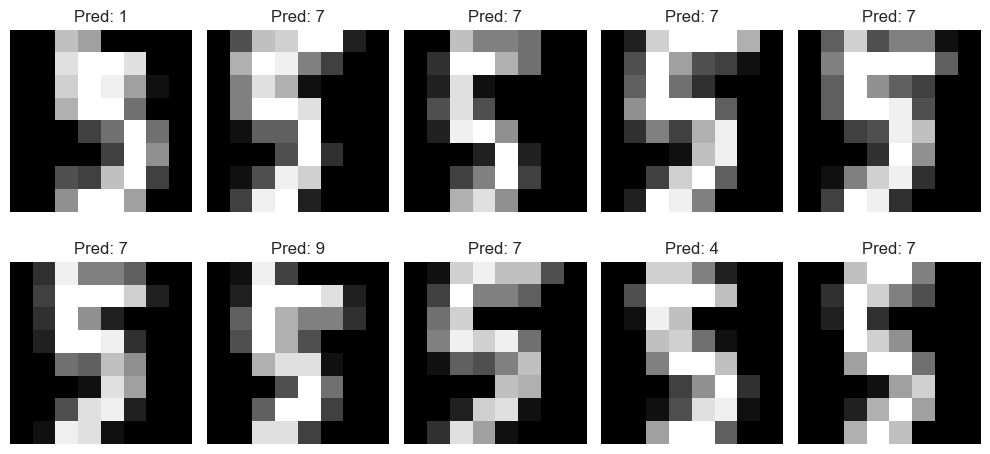

In [64]:
#Now selecting the 3rd row of the image
selected_rows = df.iloc[:, 16:23]

# Apply K-means clustering on the selected rows
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(selected_rows)

# Create a DataFrame with the data and cluster labels
alteredDf = pd.DataFrame(data, columns=[f'pixel_{i}' for i in range(data.shape[1])])
alteredDf['predictionKmeans'] = clusters
alteredDf['actualDigit'] = target

digit_5_df = alteredDf[alteredDf['actualDigit'] == 5]

# Plot 10 images where the actual digit is '5' and show its prediction
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    if i < len(digit_5_df):
        index = digit_5_df.index[i]
        image = data[index].reshape(8, 8)
        prediction = digit_5_df.loc[index, 'predictionKmeans']
        ax.imshow(image, cmap='gray')
        ax.set_title(f'Pred: {prediction}')
        ax.axis('off')

plt.tight_layout()
plt.show()

It gives us an even weirder result.

## K-Means with Columns

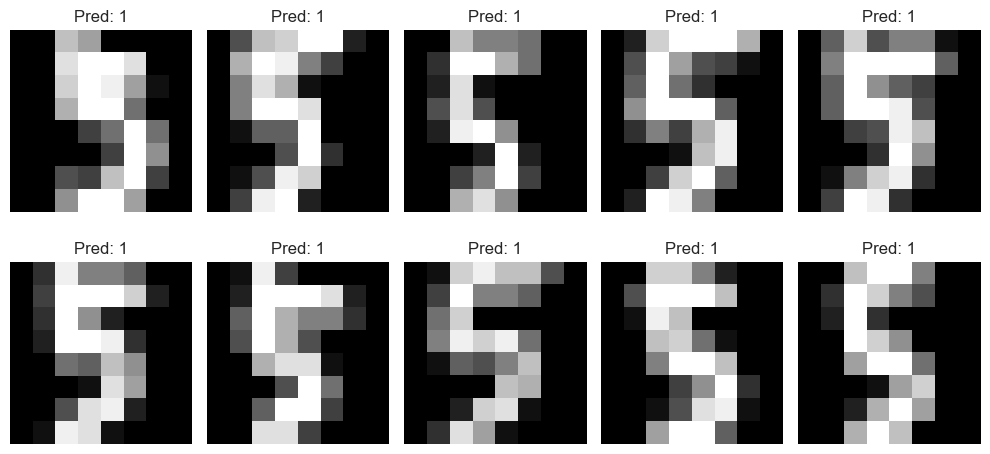

In [65]:
#Selecting the 2nd column of the image
selected_columns = df.iloc[:, [2,10,18,26,34,42,50,58]]

# Apply K-means clustering on the selected rows
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(selected_columns)

# Create a DataFrame with the data and cluster labels
alteredDf = pd.DataFrame(data, columns=[f'pixel_{i}' for i in range(data.shape[1])])
alteredDf['predictionKmeans'] = clusters
alteredDf['actualDigit'] = target

digit_5_df = alteredDf[alteredDf['actualDigit'] == 5]

# Plot 10 images where the actual digit is '5' and show its prediction
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    if i < len(digit_5_df):
        index = digit_5_df.index[i]
        image = data[index].reshape(8, 8)
        prediction = digit_5_df.loc[index, 'predictionKmeans']
        ax.imshow(image, cmap='gray')
        ax.set_title(f'Pred: {prediction}')
        ax.axis('off')

plt.tight_layout()
plt.show()

By using the second column as reference, the prediction was so off. Lets try using the middle column and the fourth one.

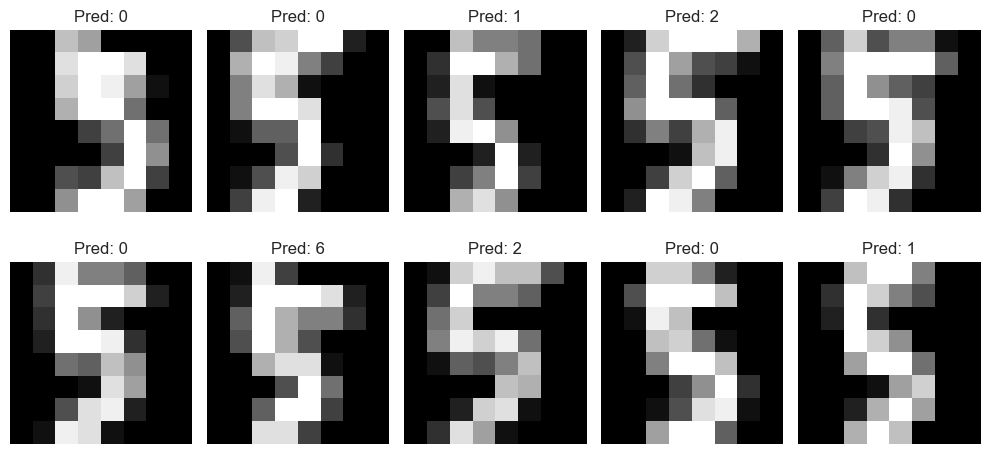

In [66]:
#Selecting the 3rd column of the image
selected_columns = df.iloc[:, [3,11,19,27,35,43,51,59]]

# Apply K-means clustering on the selected rows
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(selected_columns)

# Create a DataFrame with the data and cluster labels
alteredDf = pd.DataFrame(data, columns=[f'pixel_{i}' for i in range(data.shape[1])])
alteredDf['predictionKmeans'] = clusters
alteredDf['actualDigit'] = target

digit_5_df = alteredDf[alteredDf['actualDigit'] == 5]

# Plot 10 images where the actual digit is '5' and show its prediction
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    if i < len(digit_5_df):
        index = digit_5_df.index[i]
        image = data[index].reshape(8, 8)
        prediction = digit_5_df.loc[index, 'predictionKmeans']
        ax.imshow(image, cmap='gray')
        ax.set_title(f'Pred: {prediction}')
        ax.axis('off')

plt.tight_layout()
plt.show()

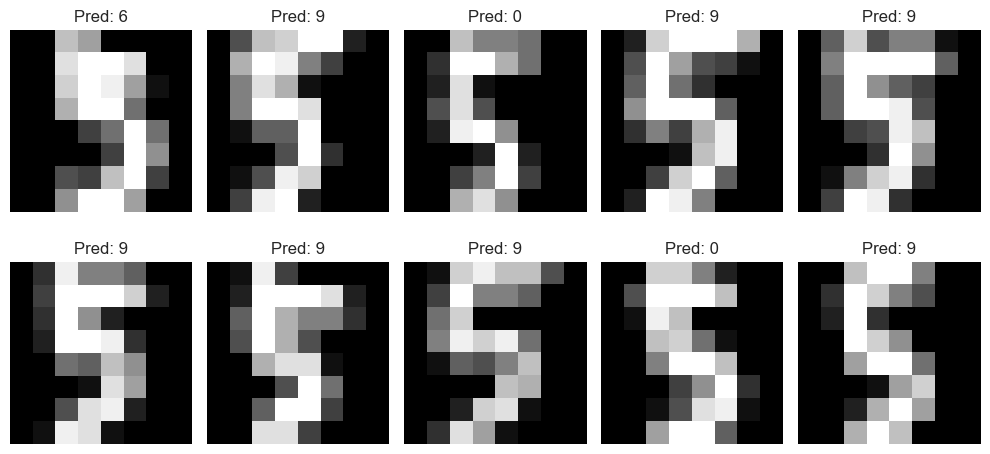

In [67]:
#Selecting the 4th column of the image
selected_columns = df.iloc[:, [4,12,20,28,36,44,52,60]]

# Apply K-means clustering on the selected rows
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(selected_columns)

# Create a DataFrame with the data and cluster labels
alteredDf = pd.DataFrame(data, columns=[f'pixel_{i}' for i in range(data.shape[1])])
alteredDf['predictionKmeans'] = clusters
alteredDf['actualDigit'] = target

digit_5_df = alteredDf[alteredDf['actualDigit'] == 5]

# Plot 10 images where the actual digit is '5' and show its prediction
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    if i < len(digit_5_df):
        index = digit_5_df.index[i]
        image = data[index].reshape(8, 8)
        prediction = digit_5_df.loc[index, 'predictionKmeans']
        ax.imshow(image, cmap='gray')
        ax.set_title(f'Pred: {prediction}')
        ax.axis('off')

plt.tight_layout()
plt.show()

By using columns or rows we cannot be 100% sure that a prediction is going to be the actual one.

# Final Conclusions

## Using the 64 values
    When using the 64 values, there are certain numbers that K-Means does not like, those number does not perform well when predicting, the number "2" and "3" are great examples of those numbers.

## Using rows and columns
    When using rows and columns, we can immediately chop all of the rows that do not contain any real value, like the first column or the last row. We can use the middle ones that have more information available for analysis. Even tho there's more data to analyze, we cannot be 100% sure of the results given by this method, we are leaving out fundamental data that help us identify each number.
    


## References

1. OpenAI (2024). ChatGPT. (versión 3.5) [LLM] https://chat.openai.com/
2. Microsoft (2024). Copilot. (basado en GPT-4) [LLM] https://copilot.microsoft.com